<a href="https://colab.research.google.com/github/blackseashark5/Adobe-Gensolve/blob/main/Copy_of_occulusion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy svgwrite cairosvg ipywidgets


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.8 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


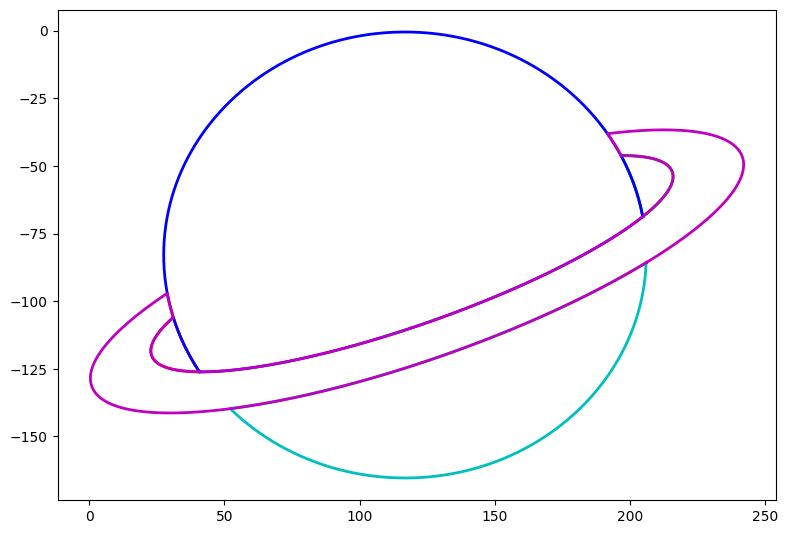

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import svgwrite
import cairosvg

# Function to read CSV file
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

# Function to plot paths
def plot_paths(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], -XY[:, 1], c=c, linewidth=2)  # Invert y-axis for correct orientation
    ax.set_aspect('equal')
    plt.show()

# Function to convert paths to SVG
def polylines2svg(paths_XYs, svg_path):
    W, H = 0, 0
    for path_XYs in paths_XYs:
        for XY in path_XYs:
            W, H = max(W, np.max(XY[:, 0])), max(H, np.max(XY[:, 1]))
    padding = 0.1
    W, H = int(W + padding * W), int(H + padding * H)
    dwg = svgwrite.Drawing(svg_path, profile='tiny', shape_rendering='crispEdges')
    colours = ['#FF0000', '#00FF00', '#0000FF', '#00FFFF', '#FF00FF', '#FFFF00', '#000000']

    group = dwg.g()
    for i, path in enumerate(paths_XYs):
        path_data = []
        c = colours[i % len(colours)]
        for XY in path:
            path_data.append(("M", (XY[0, 0], -XY[0, 1])))  # Invert y-axis for correct orientation
            for j in range(1, len(XY)):
                path_data.append(("L", (XY[j, 0], -XY[j, 1])))  # Invert y-axis for correct orientation
            if not np.allclose(XY[0], XY[-1]):
                path_data.append(("Z", None))
        group.add(dwg.path(d=path_data, fill='none', stroke=c, stroke_width=2))
    dwg.add(group)
    dwg.save()

    png_path = svg_path.replace('.svg', '.png')
    fact = max(1, 1024 // min(H, W))
    cairosvg.svg2png(url=svg_path, write_to=png_path, parent_width=W, parent_height=H, output_width=fact * W, output_height=fact * H, background_color='white')

    return

# Main function to execute the tasks
def main():
    csv_path = 'occlusion2.csv'
    svg_path = 'occlusion2_output.svg'
    paths_XYs = read_csv(csv_path)
    plot_paths(paths_XYs)
    polylines2svg(paths_XYs, svg_path)

if __name__ == '__main__':
    main()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import svgwrite
import cairosvg


In [ ]:
def read_csv(csv_path):
    try:
        np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
        path_XYs = []
        for i in np.unique(np_path_XYs[:, 0]):
            npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
            XYs = []
            for j in np.unique(npXYs[:, 0]):
                XY = npXYs[npXYs[:, 0] == j][:, 1:]
                XYs.append(XY)
            path_XYs.append(XYs)
        return path_XYs
    except Exception as e:
        print(f"Error reading CSV file: {e}")
        return []


In [ ]:
def plot_paths(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], -XY[:, 1], c=c, linewidth=2)  # Invert y-axis for correct orientation
    ax.set_aspect('equal')
    plt.show()


In [ ]:
def polylines2svg(paths_XYs, svg_path):
    W, H = 0, 0
    for path_XYs in paths_XYs:
        for XY in path_XYs:
            W, H = max(W, np.max(XY[:, 0])), max(H, np.max(XY[:, 1]))
    padding = 0.1
    W, H = int(W + padding * W), int(H + padding * H)
    dwg = svgwrite.Drawing(svg_path, profile='tiny', shape_rendering='crispEdges')
    colours = ['#FF0000', '#00FF00', '#0000FF', '#00FFFF', '#FF00FF', '#FFFF00', '#000000']

    group = dwg.g()
    for i, path in enumerate(paths_XYs):
        path_data = []
        c = colours[i % len(colours)]
        for XY in path:
            path_data.append(("M", (XY[0, 0], -XY[0, 1])))  # Invert y-axis for correct orientation
            for j in range(1, len(XY)):
                path_data.append(("L", (XY[j, 0], -XY[j, 1])))  # Invert y-axis for correct orientation
            if not np.allclose(XY[0], XY[-1]):
                path_data.append(("Z", None))
        group.add(dwg.path(d=path_data, fill='none', stroke=c, stroke_width=2))
    dwg.add(group)
    dwg.save()

    png_path = svg_path.replace('.svg', '.png')
    fact = max(1, 1024 // min(H, W))
    cairosvg.svg2png(url=svg_path, write_to=png_path, parent_width=W, parent_height=H, output_width=fact * W, output_height=fact * H, background_color='white')


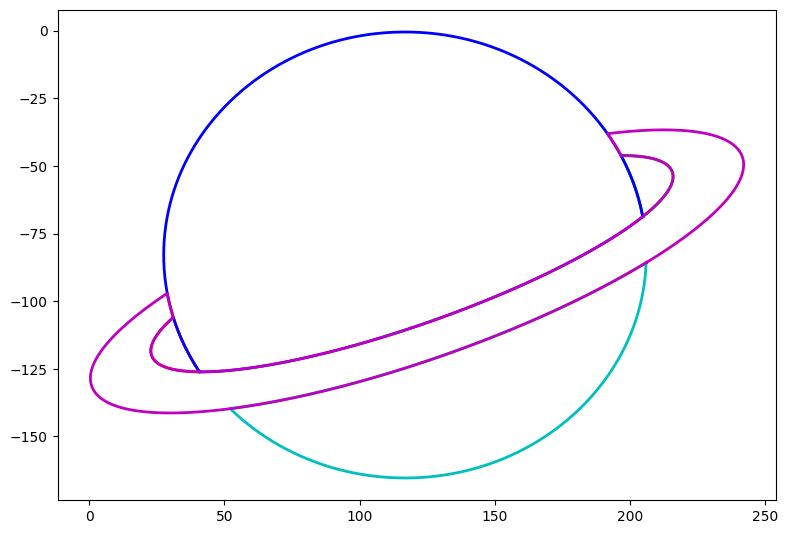

In [ ]:
def main():
    csv_path = 'occlusion2.csv'
    svg_path = 'occlusion2_output.svg'
    paths_XYs = read_csv(csv_path)
    plot_paths(paths_XYs)
    polylines2svg(paths_XYs, svg_path)

if __name__ == '__main__':
    main()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def read_csv(csv_path):
    try:
        np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
        path_XYs = []
        for i in np.unique(np_path_XYs[:, 0]):
            npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
            XYs = []
            for j in np.unique(npXYs[:, 0]):
                XY = npXYs[npXYs[:, 0] == j][:, 1:]
                XYs.append(XY)
            path_XYs.append(XYs)
        return path_XYs
    except Exception as e:
        print(f"Error reading CSV file: {e}")
        return []


In [ ]:
def plot_individual_shapes(paths_XYs):
    colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    for i, XYs in enumerate(paths_XYs):
        fig, ax = plt.subplots(tight_layout=True, figsize=(6, 6))
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], -XY[:, 1], c=c, linewidth=2)  # Invert y-axis for correct orientation
        ax.set_aspect('equal')
        ax.set_title(f'Path {i}')
        plt.show()


Read 5 paths from occlusion2.csv


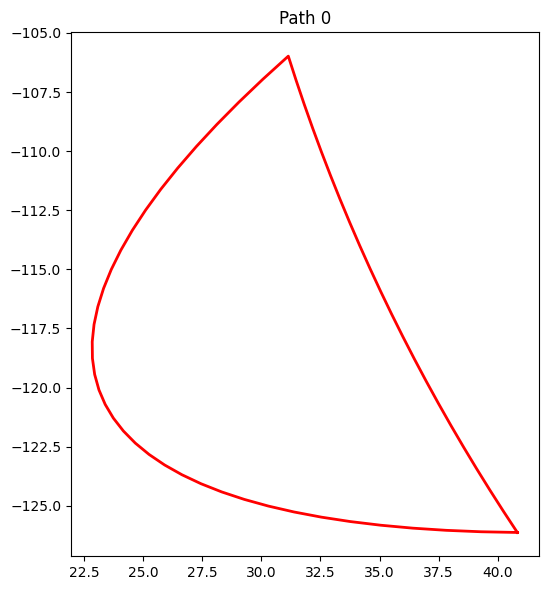

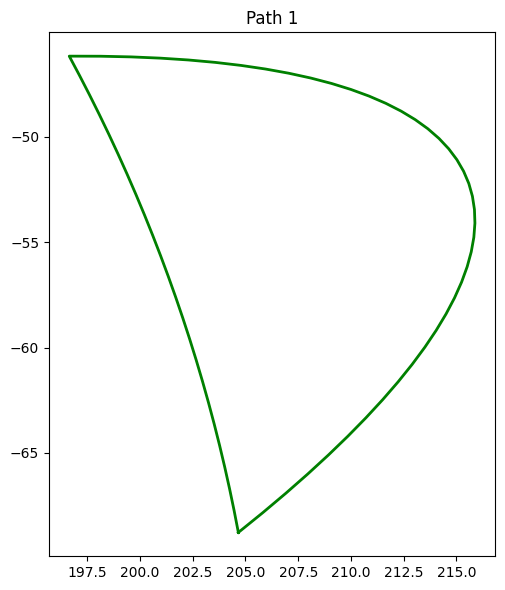

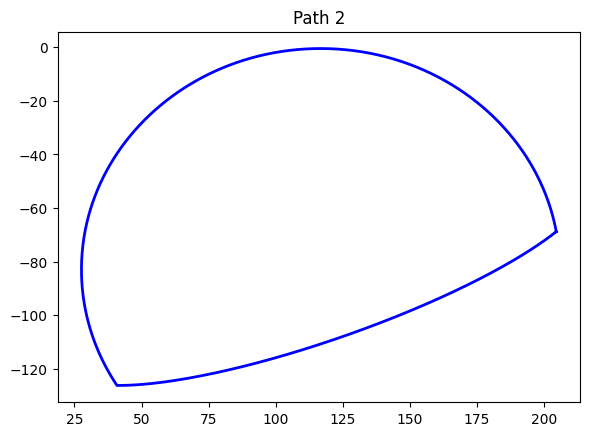

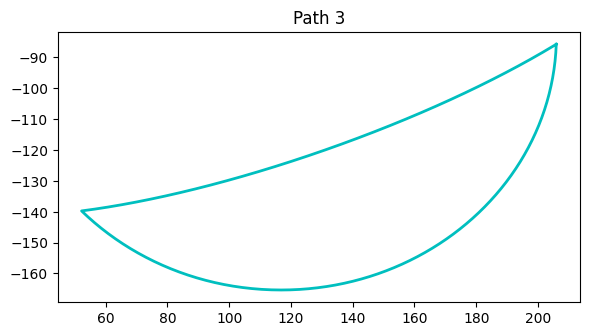

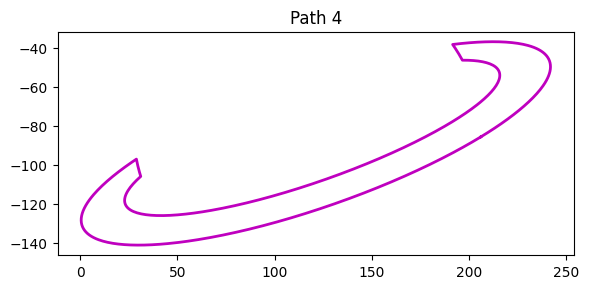

In [ ]:
def main_read_and_debug():
    csv_path = 'occlusion2.csv'
    paths_XYs = read_csv(csv_path)
    print(f"Read {len(paths_XYs)} paths from {csv_path}")

    # Plot individual shapes to debug
    plot_individual_shapes(paths_XYs)
    return paths_XYs

paths_XYs = main_read_and_debug()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def read_csv(csv_path):
    try:
        np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
        path_XYs = []
        for i in np.unique(np_path_XYs[:, 0]):
            npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
            XYs = []
            for j in np.unique(npXYs[:, 0]):
                XY = npXYs[npXYs[:, 0] == j][:, 1:]
                XYs.append(XY)
            path_XYs.append(XYs)
        return path_XYs
    except Exception as e:
        print(f"Error reading CSV file: {e}")
        return []


In [ ]:
def plot_individual_shapes(paths_XYs):
    colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    for i, XYs in enumerate(paths_XYs):
        fig, ax = plt.subplots(tight_layout=True, figsize=(6, 6))
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], -XY[:, 1], c=c, linewidth=2)  # Invert y-axis for correct orientation
        ax.set_aspect('equal')
        ax.set_title(f'Path {i}')
        plt.show()


In [ ]:
def regularize_shapes(paths_XYs):
    regularized_paths = []
    for path in paths_XYs:
        regularized_path = []
        for XY in path:
            # Example regularization: normalize to a [0, 1] scale
            min_x, min_y = np.min(XY, axis=0)
            max_x, max_y = np.max(XY, axis=0)
            XY_regularized = (XY - [min_x, min_y]) / (max_x - min_x, max_y - min_y)
            regularized_path.append(XY_regularized)
        regularized_paths.append(regularized_path)
    return regularized_paths


Read 5 paths from occlusion2.csv
Regularized shapes.


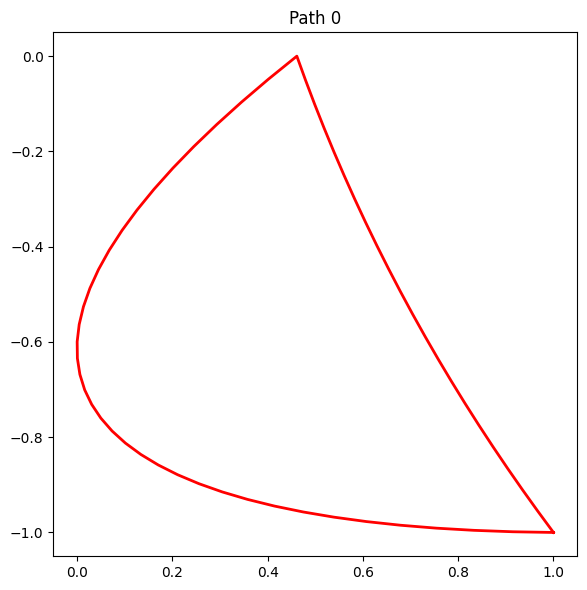

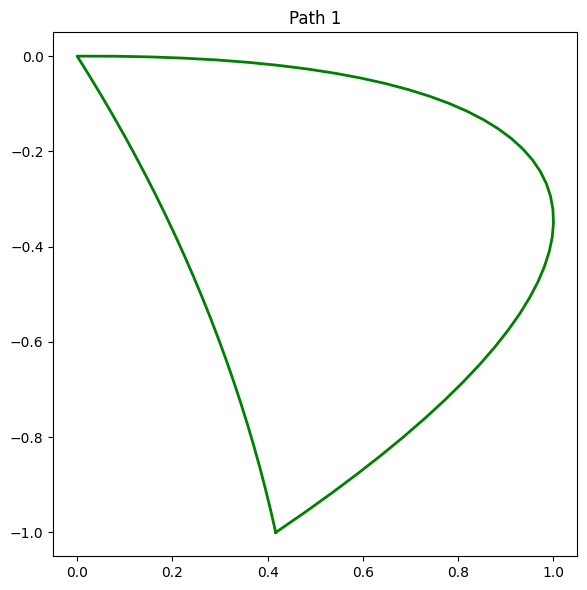

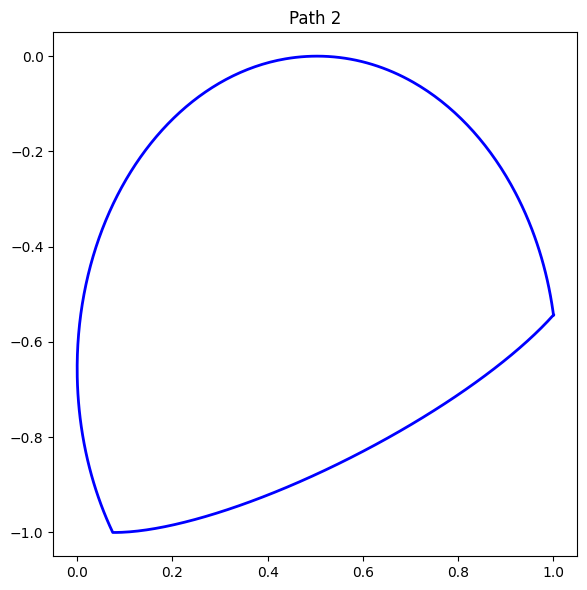

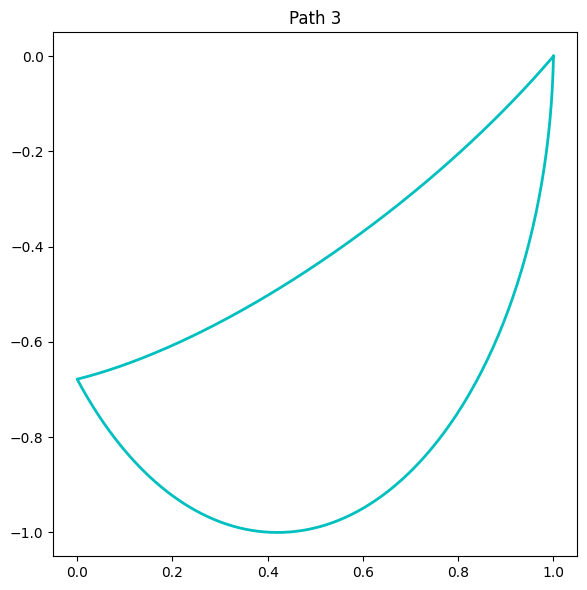

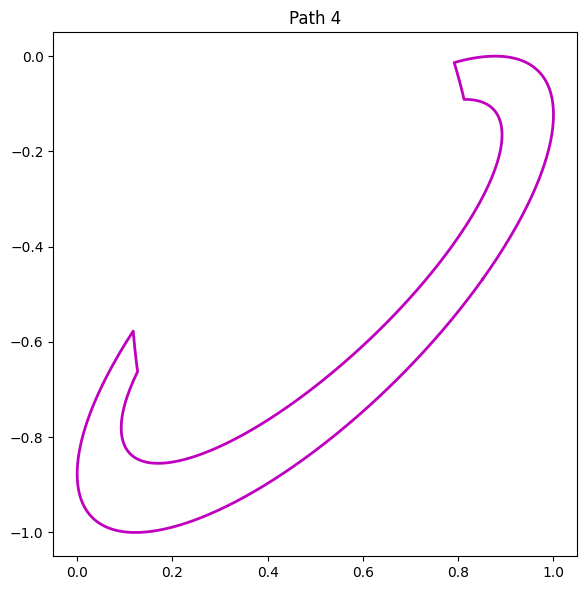

In [ ]:
def main_read_regularize_and_visualize():
    csv_path = 'occlusion2.csv'
    paths_XYs = read_csv(csv_path)
    print(f"Read {len(paths_XYs)} paths from {csv_path}")

    # Regularize the shapes
    regularized_paths_XYs = regularize_shapes(paths_XYs)
    print("Regularized shapes.")

    # Plot regularized shapes
    plot_individual_shapes(regularized_paths_XYs)
    return regularized_paths_XYs

regularized_paths_XYs = main_read_regularize_and_visualize()


In [ ]:
def is_symmetric(XY, tolerance=1e-2):
    # Check horizontal symmetry around the vertical axis (x = 0.5 after normalization)
    x_coords = XY[:, 0]
    symmetric = np.allclose(x_coords, 1 - x_coords, atol=tolerance)
    return symmetric



In [ ]:
def plot_symmetric_shapes(paths_XYs):
    colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    symmetric_paths = []
    for i, XYs in enumerate(paths_XYs):
        is_symmetric_flag = all(is_symmetric(XY) for XY in XYs)
        if is_symmetric_flag:
            symmetric_paths.append(XYs)
            fig, ax = plt.subplots(tight_layout=True, figsize=(6, 6))
            c = colours[i % len(colours)]
            for XY in XYs:
                ax.plot(XY[:, 0], -XY[:, 1], c=c, linewidth=2)  # Invert y-axis for correct orientation
            ax.set_aspect('equal')
            ax.set_title(f'Symmetric Path {i}')
            plt.show()
    return symmetric_paths



In [ ]:
def main_visualize_symmetric_shapes():
    csv_path = 'frag0.csv'  # Replace with your CSV file path
    paths_XYs = read_csv(csv_path)
    print(f"Read {len(paths_XYs)} paths from {csv_path}")

    # Regularize the shapes
    regularized_paths_XYs = regularize_shapes(paths_XYs)
    print("Regularized shapes.")

    # Check for symmetry and plot symmetric shapes
    symmetric_paths_XYs = plot_symmetric_shapes(regularized_paths_XYs)

    if not symmetric_paths_XYs:
        print("No symmetric paths found.")
    else:
        print(f"Visualized {len(symmetric_paths_XYs)} symmetric paths.")

    return symmetric_paths_XYs

# Run the main function to visualize symmetric shapes
symmetric_paths_XYs = main_visualize_symmetric_shapes()



Error reading CSV file: frag0.csv not found.
Read 0 paths from frag0.csv
Regularized shapes.
No symmetric paths found.


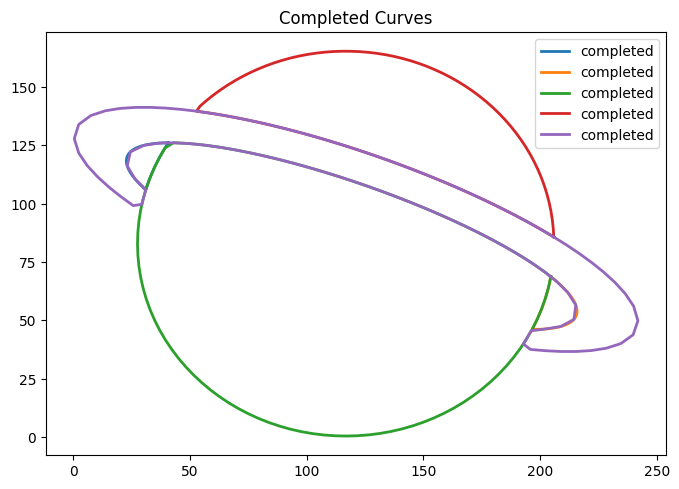

In [ ]:
# Cell 4: Complete Curves and Plot Completed Curves
def main_complete_and_plot(paths_XYs):
    completed_shapes = complete_curves(paths_XYs)
    fig, ax = plt.subplots(figsize=(8, 8))
    if completed_shapes:
        plot_shapes(completed_shapes, "Completed Curves", ax)
    else:
        ax.text(0.5, 0.5, 'No completed curves detected', horizontalalignment='center', verticalalignment='center', fontsize=12, color='gray')
    plt.title("Completed Curves")
    plt.show()

main_complete_and_plot(paths_XYs)
